<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>



# **Final Project: Boston Housing**


##### Estimated time needed: **60** minutes


#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

<ipython-input-2-b3fdaf15785b>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [ ]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [7]:
# --- STEP 1: IMPORT LIBRARIES AND LOAD DATA ---
import piplite
await piplite.install(['numpy', 'pandas', 'seaborn', 'statsmodels', 'scipy'])

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from js import fetch
import io

# Load the dataset
URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())
boston_df = pd.read_csv(boston_url)

print("Data loaded successfully!")

# --- STEP 2: RUN THE T-TEST (Question 1) ---

# Levene's Test (to check for equality of variance)
levene_test = scipy.stats.levene(boston_df[boston_df['CHAS'] == 0]['MEDV'],
                                 boston_df[boston_df['CHAS'] == 1]['MEDV'], 
                                 center='mean')
print(f"Levene's Test: {levene_test}")

# T-Test
# Since Levene's p-value is likely < 0.05, we assume unequal variance (equal_var=False)
f_statistic, p_value = scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 0]['MEDV'],
                                            boston_df[boston_df['CHAS'] == 1]['MEDV'],
                                            equal_var=False)

print(f"T-Test Statistic: {f_statistic}, P-Value: {p_value}")

Data loaded successfully!
Levene's Test: LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)
T-Test Statistic: -3.113291312794837, P-Value: 0.003567170098137517


Data loaded successfully!


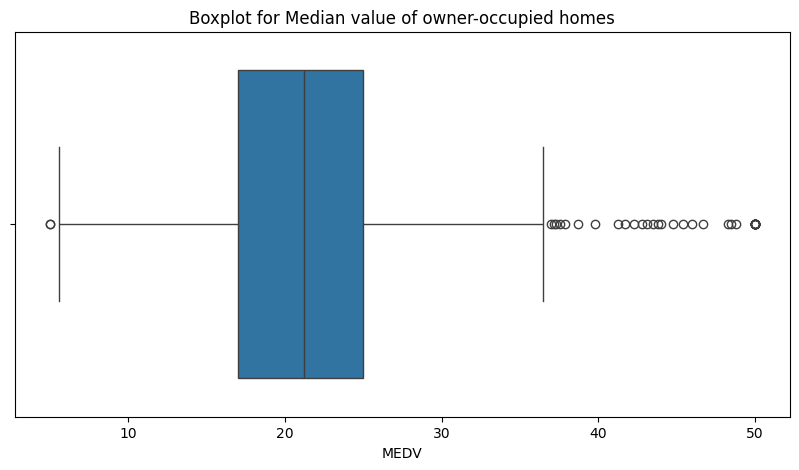

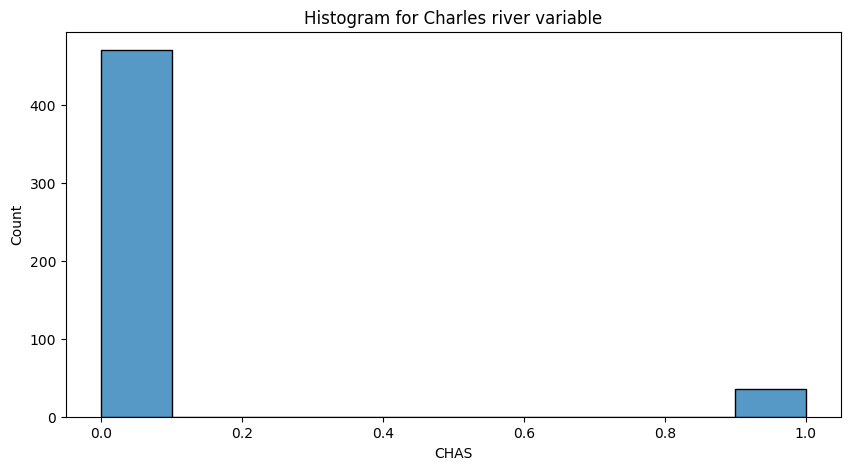

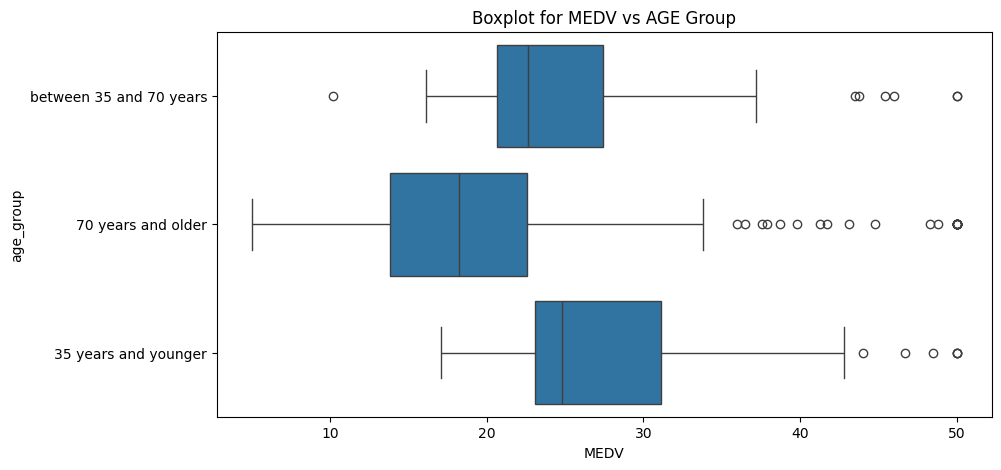

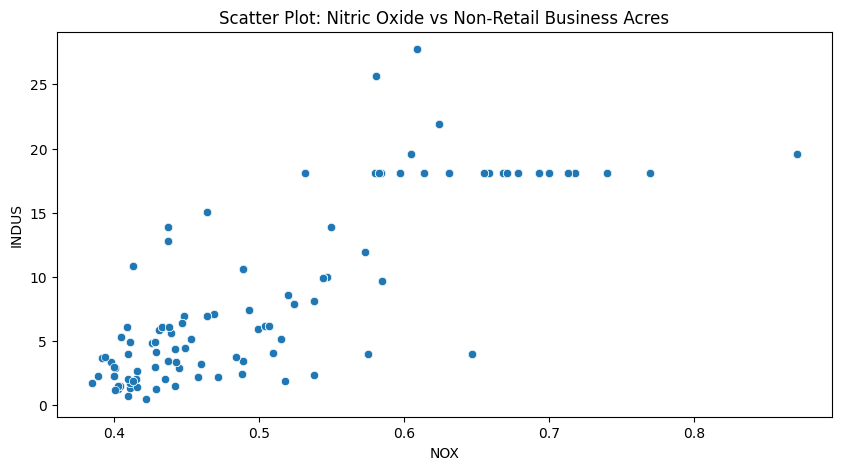

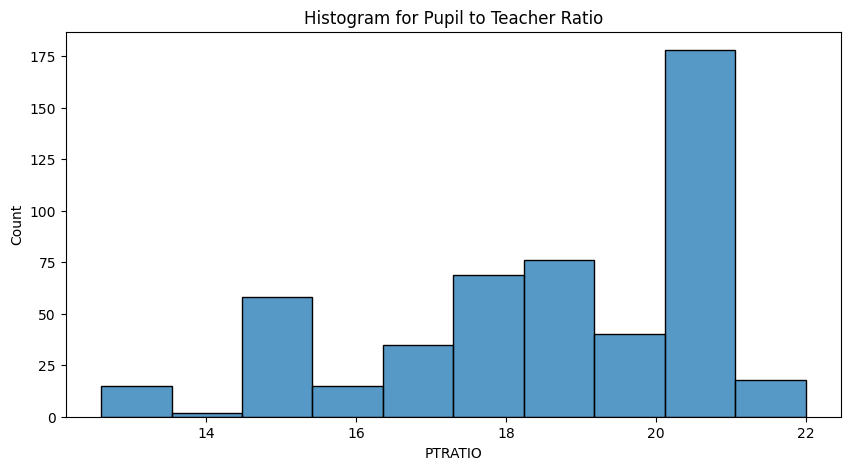


--- Question 1: T-test (CHAS vs MEDV) ---
P-value: 0.003567170098137517

--- Question 2: ANOVA (AGE Groups vs MEDV) ---
P-value: 1.7105011022702984e-15

--- Question 3: Pearson Correlation (NOX vs INDUS) ---
Pearson Coefficient: 0.7636514469209192, P-value: 7.913361061210442e-98

--- Question 4: Regression Analysis (DIS vs MEDV) ---
                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Tue, 23 Dec 2025   Prob (F-statistic):           1.21e-08
Time:                        13:36:11   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                       

In [5]:
import piplite
await piplite.install(['numpy', 'pandas', 'seaborn', 'statsmodels', 'scipy'])

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from js import fetch
import io

# --- PART 1: LOAD THE DATA ---
URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())
boston_df = pd.read_csv(boston_url)
print("Data loaded successfully!")

# --- PART 2: VISUALIZATIONS (Task 1) ---

# 1. Boxplot for "Median value of owner-occupied homes"
pyplot.figure(figsize=(10,5))
sns.boxplot(x=boston_df['MEDV'])
pyplot.title("Boxplot for Median value of owner-occupied homes")
pyplot.show()

# 2. Histogram for Charles river variable
pyplot.figure(figsize=(10,5))
sns.histplot(boston_df['CHAS'], bins=10)
pyplot.title("Histogram for Charles river variable")
pyplot.show()

# 3. Boxplot for MEDV vs AGE variable
# Create age groups first
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'

pyplot.figure(figsize=(10,5))
sns.boxplot(x='MEDV', y='age_group', data=boston_df)
pyplot.title("Boxplot for MEDV vs AGE Group")
pyplot.show()

# 4. Scatter plot for Nitric oxide vs Non-retail business acres
pyplot.figure(figsize=(10,5))
sns.scatterplot(x='NOX', y='INDUS', data=boston_df)
pyplot.title("Scatter Plot: Nitric Oxide vs Non-Retail Business Acres")
pyplot.show()

# 5. Histogram for pupil to teacher ratio
pyplot.figure(figsize=(10,5))
sns.histplot(boston_df['PTRATIO'], bins=10)
pyplot.title("Histogram for Pupil to Teacher Ratio")
pyplot.show()


# --- PART 3: STATISTICAL TESTS (Task 2) ---

# Question 1: T-test (CHAS vs MEDV)
print("\n--- Question 1: T-test (CHAS vs MEDV) ---")
scipy.stats.levene(boston_df[boston_df['CHAS'] == 0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 1]['MEDV'], center='mean')
stat, p_val = scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 0]['MEDV'],
                                    boston_df[boston_df['CHAS'] == 1]['MEDV'],
                                    equal_var=False)
print(f"P-value: {p_val}")

# Question 2: ANOVA (AGE Groups vs MEDV)
print("\n--- Question 2: ANOVA (AGE Groups vs MEDV) ---")
thirtyfive_lower = boston_df[boston_df['age_group'] == '35 years and younger']['MEDV']
thirtyfive_seventy = boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV']
seventy_older = boston_df[boston_df['age_group'] == '70 years and older']['MEDV']
f_stat, p_val = scipy.stats.f_oneway(thirtyfive_lower, thirtyfive_seventy, seventy_older)
print(f"P-value: {p_val}")

# Question 3: Pearson Correlation (NOX vs INDUS)
print("\n--- Question 3: Pearson Correlation (NOX vs INDUS) ---")
p_coef, p_val = scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])
print(f"Pearson Coefficient: {p_coef}, P-value: {p_val}")

# Question 4: Regression Analysis (DIS vs MEDV)
print("\n--- Question 4: Regression Analysis (DIS vs MEDV) ---")
X = boston_df['DIS']
y = boston_df['MEDV']
X = sm.add_constant(X) 
model = sm.OLS(y, X).fit()
print(model.summary())

In [6]:
import scipy.stats

# Question 1: T-test for MEDV bounded by Charles river (CHAS)
# H0: No significant difference in mean MEDV for houses near Charles River vs not
print("--- Question 1: T-test (CHAS vs MEDV) ---")
scipy.stats.levene(boston_df[boston_df['CHAS'] == 0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 1]['MEDV'], center='mean')
# Levene's p-value < 0.05 implies unequal variance
stat, p_val = scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 0]['MEDV'],
                                    boston_df[boston_df['CHAS'] == 1]['MEDV'],
                                    equal_var=False)
print(f"P-value: {p_val}")
if p_val < 0.05:
    print("Conclusion: Reject H0. There is a significant difference.\n")
else:
    print("Conclusion: Fail to reject H0.\n")

# Question 2: ANOVA for MEDV vs AGE groups
# H0: Means are equal across all age groups
print("--- Question 2: ANOVA (AGE Groups vs MEDV) ---")
thirtyfive_lower = boston_df[boston_df['age_group'] == '35 years and younger']['MEDV']
thirtyfive_seventy = boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV']
seventy_older = boston_df[boston_df['age_group'] == '70 years and older']['MEDV']

f_stat, p_val = scipy.stats.f_oneway(thirtyfive_lower, thirtyfive_seventy, seventy_older)
print(f"P-value: {p_val}")
if p_val < 0.05:
    print("Conclusion: Reject H0. At least one age group mean is different.\n")
else:
    print("Conclusion: Fail to reject H0.\n")

# Question 3: Pearson Correlation for NOX vs INDUS
# H0: No correlation
print("--- Question 3: Pearson Correlation (NOX vs INDUS) ---")
p_coef, p_val = scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])
print(f"Pearson Coefficient: {p_coef}, P-value: {p_val}")
if p_val < 0.05:
    print("Conclusion: Reject H0. There is a correlation.\n")
else:
    print("Conclusion: Fail to reject H0.\n")

# Question 4: Regression Analysis (DIS vs MEDV)
# H0: Weighted distance to employment centres (DIS) has no impact on MEDV
print("--- Question 4: Regression Analysis (DIS vs MEDV) ---")
X = boston_df['DIS']
y = boston_df['MEDV']
X = sm.add_constant(X) 
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
print(model.summary())

--- Question 1: T-test (CHAS vs MEDV) ---
P-value: 0.003567170098137517
Conclusion: Reject H0. There is a significant difference.

--- Question 2: ANOVA (AGE Groups vs MEDV) ---
P-value: 1.7105011022702984e-15
Conclusion: Reject H0. At least one age group mean is different.

--- Question 3: Pearson Correlation (NOX vs INDUS) ---
Pearson Coefficient: 0.7636514469209192, P-value: 7.913361061210442e-98
Conclusion: Reject H0. There is a correlation.

--- Question 4: Regression Analysis (DIS vs MEDV) ---
                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Tue, 23 Dec 2025   Prob (F-statistic):           1.21e-08
Time:                        13:37:28   Log-Likelihood:                -1823.9
No. Observations:    